In [1]:
import numpy as np
import numpy.linalg as npl
import numpy.random as npr
from scipy.stats import norm, chi2
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Exercise 3.2

Given data on two variables X and Y , consider fitting a cubic
polynomial regression model $f(X) = \sum^3_{j=0} \beta_j X_j$. In addition to plotting
the fitted curve, you would like a 95% confidence band about the curve.
Consider the following two approaches:

1. At each point x0, form a 95% confidence interval for the linear function $a^T \beta = \sum^3_{j=0} \beta_j x^j_0$.

2. Form a 95% confidence set for β as in (3.15), which in turn generates confidence intervals for f(x0).

How do these approaches differ? Which band is likely to be wider? Conduct
a small simulation experiment to compare the two methods.

# Solution

Let's first generate the data,

In [2]:
x_range = np.arange(-2,2,0.1)
N = x_range.size
p = 3

# Input data
X = np.array([[x**i for i in range(p+1)] for x in x_range])

# Noisy response
beta = npr.rand(p+1)
y = X @ beta + np.array([npr.normal() for _ in x_range])

We fit using linear regression (normal equations),

In [3]:
W = X.T @ X
V = npl.pinv(W)

beta_est = V @ X.T @ y
y_est = X @ beta_est

# The estimate of the noise affecting the response is, 
r = y - y_est
sigma2_est = (r.T @ r)/(N-p-1)

We can use the std error of $\beta$ to compute the confidence levels,

In [4]:
# lower and upper boundary (first approach)
lb = [x.T @ beta_est - norm.ppf(0.975) * np.sqrt(x.T @ V @ x * sigma2_est) for x in X]
hb = [x.T @ beta_est + norm.ppf(0.975) * np.sqrt(x.T @ V @ x * sigma2_est) for x in X]

Else, we use the fact that the variance has chi-square distribution,

In [5]:
# lower and upper bounds (second approach)
sigma_beta = V * sigma2_est # This is needed to sample good beta parameters

betas_conf_interval = []
counter = 0

while counter < 10:
    beta0 = npr.multivariate_normal(beta_est, sigma_beta)
    gamma0 = beta_est - beta0
    
    # if the beta sampled is in the confidence interval, we accept it
    if gamma0.T @ W @ gamma0 - sigma2_est*chi2.ppf(0.95,df=p) <= 0:
        betas_conf_interval.append(beta0)
        counter += 1

And we compare the results,

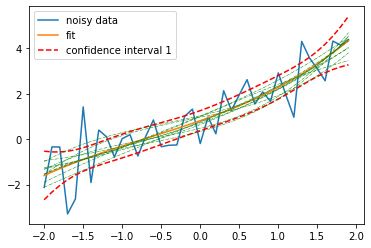

In [9]:
plt.plot(x_range,y,label='noisy data')
plt.plot(x_range,y_est,label='fit')
plt.plot(x_range,lb,'r--',label='confidence interval 1')
plt.plot(x_range,hb,'r--')

for beta0 in betas_conf_interval:
    y0 = X @ beta0
    plt.plot(x_range,y0,'g-.',linewidth=0.5)
    
plt.legend()
plt.show()